# SA1

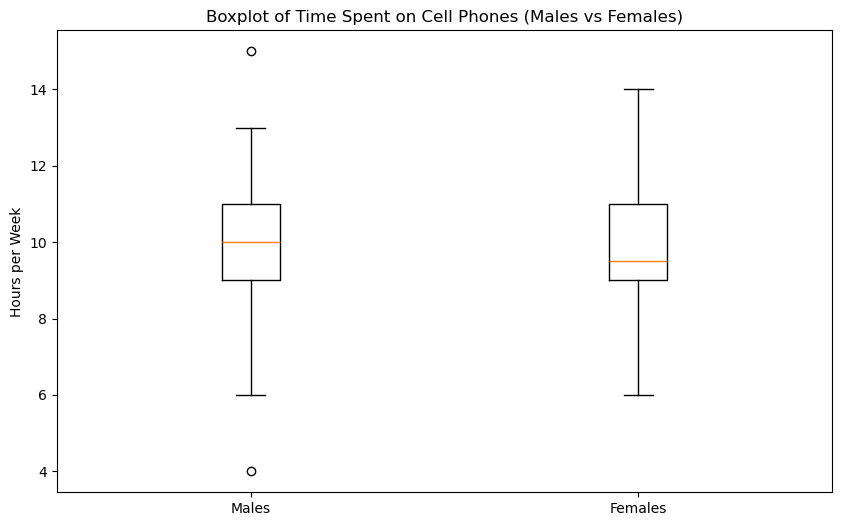

{'t_stat': 0.30394907866566184,
 'p_value': 0.7618111039906375,
 'male_stats': (50, 9.82, 0.3046443225555108, 4, 15),
 'female_stats': (50, 9.7, 0.2511199404463849, 6, 14),
 'male_ci': (9.207794313260433, 10.432205686739568),
 'female_ci': (9.195355586129574, 10.204644413870424),
 'mean_diff_ci': (-0.6634736514965714, 0.9034736514965734)}

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

male_hours = np.array([
    12, 7, 7, 10, 8, 10, 11, 9, 9, 13,
    4, 9, 12, 11, 9, 9, 7, 12, 10, 13,
    11, 10, 6, 12, 11, 9, 10, 12, 8, 9,
    13, 10, 9, 7, 10, 7, 10, 8, 11, 10,
    11, 7, 15, 8, 9, 9, 11, 13, 10, 13])

female_hours = np.array([
    11, 10, 11, 10, 11, 12, 12, 10, 9, 9,
    9, 10, 8, 7, 12, 9, 7, 8, 8, 9,
    7, 7, 9, 9, 12, 10, 9, 13, 9, 9,
    10, 9, 6, 12, 8, 11, 8, 8, 11, 12,
    9, 10, 11, 14, 12, 7, 11, 10, 9, 11])

# Hypothesis:
# H0: There is no significant difference between the mean time spent on cell phones by males and females.
# H1: There is a significant difference between the mean time spent on cell phones by males and females.

# Performing two-sample t-test
t_stat, p_value = stats.ttest_ind(male_hours, female_hours)

# Descriptive statistics
def descriptive_stats(data):
    mean = np.mean(data)
    std_error = stats.sem(data)
    min_val = np.min(data)
    max_val = np.max(data)
    return len(data), mean, std_error, min_val, max_val

male_stats = descriptive_stats(male_hours)
female_stats = descriptive_stats(female_hours)

# 95% confidence intervals for the means
male_ci = stats.t.interval(0.95, len(male_hours)-1, loc=np.mean(male_hours), scale=stats.sem(male_hours))
female_ci = stats.t.interval(0.95, len(female_hours)-1, loc=np.mean(female_hours), scale=stats.sem(female_hours))

# 95% confidence interval for the difference between the two means
mean_diff = np.mean(male_hours) - np.mean(female_hours)
pooled_se = np.sqrt(stats.sem(male_hours)**2 + stats.sem(female_hours)**2)
mean_diff_ci = stats.t.interval(0.95, len(male_hours) + len(female_hours) - 2, loc=mean_diff, scale=pooled_se)



# Plotting the data for comparison
plt.figure(figsize=(10, 6))
plt.boxplot([male_hours, female_hours], labels=["Males", "Females"])
plt.title("Boxplot of Time Spent on Cell Phones (Males vs Females)")
plt.ylabel("Hours per Week")
plt.show()

{
    "t_stat": t_stat, 
    "p_value": p_value, 
    "male_stats": male_stats, 
    "female_stats": female_stats,
    "male_ci": male_ci, 
    "female_ci": female_ci, 
    "mean_diff_ci": mean_diff_ci
}


# Hypothesis Test

This research is interested in comparing the mean time spent on cell phones by male and female college students. The hypothesis test can be framed as:

Null Hypothesis (H₀): There is no significant difference in the mean time spent on cell phones by male and female students.

Alternative Hypothesis (H₁): There is a significant difference in the mean time spent on cell phones by male and female students.

This is a two-tailed test, and a two-sample independent t-test is appropriate to determine whether the means of the two independent groups (males and females) differ significantly.

# Hypothesis Test Conclusion

t-statistic: 0.304

p-value: 0.762

Since the p-value (0.762) is greater than the common alpha level of 0.05, we fail to reject the null hypothesis. This suggests that there is no statistically significant difference between the mean time spent on cell phones by male and female students.


# Descriptive Statistics

Males:

    Population: 50

    Mean: 9.82 hours/week

    Standard Error of Mean: 0.305

    Minimum: 4 hours

    Maximum: 15 hours


Females:

    Population: 50

    Mean: 9.7 hours/week

    Standard Error of Mean: 0.251

    Minimum: 6 hours

    Maximum: 14 hours

# Confidence Interval

95% CI for Males: (9.21, 10.43)

95% CI for Females: (9.20, 10.20)

95% CI for Difference between Means: (-0.66, 0.90)

The confidence interval for the difference between the means includes zero, indicating that there is no significant difference in the average time spent on cell phones between the two groups.



# Need for Larger Sample Sizes


Given the relatively high p-value (0.762) and the confidence intervals, it seems that there is no strong evidence of a difference in means. However, if a more precise estimate of the mean difference is required or if more subtle effects are to be detected, increasing the sample size could improve the power of the test. Larger samples would provide narrower confidence intervals and reduce the margin of error.

# Report and Assumption Testing

Assumptions:
1. You have one dependent variable that is measured at the continuous level.
2. You have one independent variable that consists of two categorical, independent groups
(i.e., a dichotomous variable).
3. You should have independence of observations, which means that there is no relationship
between the observations in each group of the independent variable or between the
groups themselves.
4. There should be no significant outliers in the two groups of your independent variable in
terms of the dependent variable.
5. Your dependent variable should be approximately normally distributed for each group of
the independent variable.
6. You have homogeneity of variances (i.e., the variance of the dependent variable is equal
in each group of your independent variable)

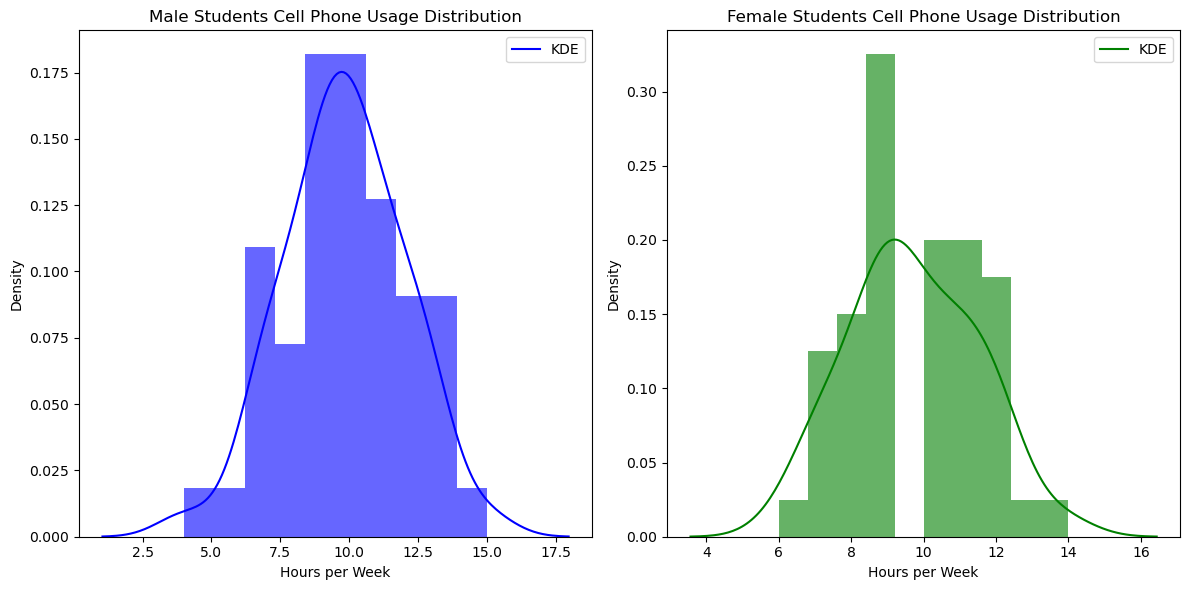

{'shapiro_male': ShapiroResult(statistic=0.9746539794869001, pvalue=0.3539889622001458),
 'shapiro_female': ShapiroResult(statistic=0.9638767847871548, pvalue=0.12919719507959687)}

In [25]:
# Performing the Shapiro-Wilk test for normality
import seaborn as sns

shapiro_male = stats.shapiro(male_hours)
shapiro_female = stats.shapiro(female_hours)

# Plotting histograms with KDE for distribution visualization
plt.figure(figsize=(12, 6))

# Male distribution
plt.subplot(1, 2, 1)
plt.hist(male_hours, bins=10, alpha=0.6, color='blue', density=True)
sns.kdeplot(male_hours, color='blue', label='KDE')
plt.title('Male Students Cell Phone Usage Distribution')
plt.xlabel('Hours per Week')
plt.ylabel('Density')
plt.legend()

# Female distribution
plt.subplot(1, 2, 2)
plt.hist(female_hours, bins=10, alpha=0.6, color='green', density=True)
sns.kdeplot(female_hours, color='green', label='KDE')
plt.title('Female Students Cell Phone Usage Distribution')
plt.xlabel('Hours per Week')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

{
    "shapiro_male": shapiro_male, 
    "shapiro_female": shapiro_female
}

Shapiro-Wilk Statistic:

    Males: 0.975
    Females: 0.964

This suggests that both the male and female data sets are normally distributed which can also be visualy observed from the graphs.

In [27]:
levene_test = stats.levene(male_hours, female_hours)

levene_test

LeveneResult(statistic=0.6943460393935098, pvalue=0.4067163398636344)

Levene's Statistic: 0.694